In [127]:
!pip install kaggle

In [128]:
# from google.colab import files
# files.upload()
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c flight-delays-fall-2018

In [129]:
# !unzip /content/flight-delays-fall-2018.zip -d /content/
# !unzip /content/flight_delays_test.csv.zip -d /content/
# !unzip /content/flight_delays_train.csv.zip -d /content/
# !unzip /content/sample_submission.csv.zip -d /content/

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('./flight_delays_train.csv')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [132]:
df.shape

(100000, 9)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [134]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [135]:
import seaborn as sns

<Axes: ylabel='DepTime'>

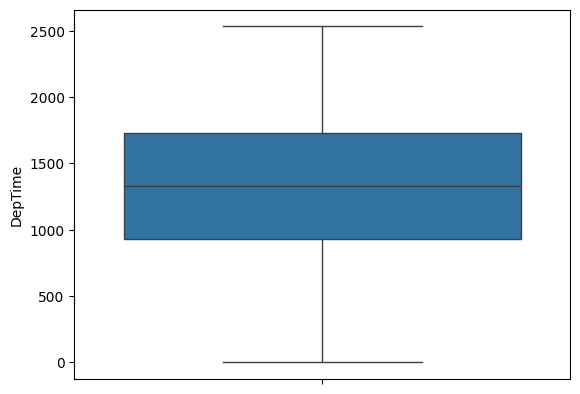

In [136]:
sns.boxplot(df['DepTime'])

<Axes: ylabel='Distance'>

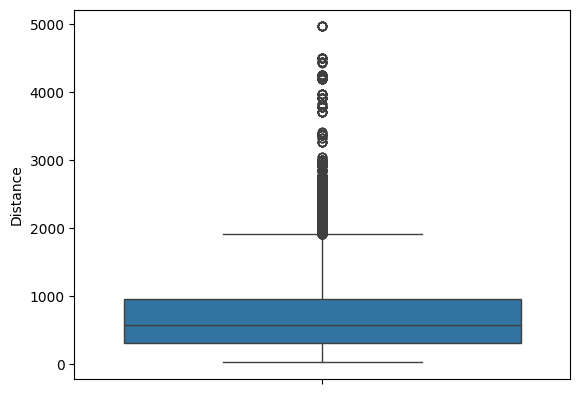

In [137]:
sns.boxplot(df['Distance'])

In [138]:
# df[df['Distance'] < 2000]['dep_delayed_15min'].value_counts()

In [139]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

In [140]:
for col in df.columns:
  print("\n*****")
  if len(df[col].unique()) > 24:
    print(col, len(df[col].unique()))
  else:
    print(col, df[col].unique())
    print(df[col].value_counts())
  print(df[col].shape, df[col].isnull().sum())
  print("*****\n")


*****
Month ['c-8' 'c-4' 'c-9' 'c-11' 'c-10' 'c-1' 'c-7' 'c-6' 'c-5' 'c-3' 'c-12'
 'c-2']
Month
c-8     8830
c-7     8706
c-3     8595
c-5     8543
c-6     8414
c-4     8408
c-10    8405
c-12    8265
c-11    8178
c-9     8163
c-1     8075
c-2     7418
Name: count, dtype: int64
(100000,) 0
*****


*****
DayofMonth 31
(100000,) 0
*****


*****
DayOfWeek ['c-7' 'c-3' 'c-5' 'c-6' 'c-4' 'c-2' 'c-1']
DayOfWeek
c-4    14736
c-5    14657
c-2    14604
c-1    14569
c-3    14508
c-7    14097
c-6    12829
Name: count, dtype: int64
(100000,) 0
*****


*****
DepTime 1300
(100000,) 0
*****


*****
UniqueCarrier ['AA' 'US' 'XE' 'OO' 'WN' 'NW' 'DL' 'OH' 'AS' 'UA' 'MQ' 'CO' 'EV' 'DH'
 'YV' 'F9' 'AQ' 'TZ' 'HP' 'B6' 'FL' 'HA']
UniqueCarrier
WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name

In [141]:
print(set(df['Dest'].values) - set(df['Origin'].values))
print(set(df['Origin'].values) - set(df['Dest'].values))

{'TTN', 'SOP'}
{'ADK', 'OAJ'}


In [142]:
test_df = pd.read_csv('./flight_delays_test.csv')
test_df.shape

(100000, 8)

In [143]:
top_30_test_origins = test_df['Origin'].value_counts().head(30).index

train_origins = set(df['Origin'].unique())

unseen_origins = [origin for origin in top_30_test_origins if origin not in train_origins]

print("Top 30 most frequent test Origins not in train:")
print(unseen_origins)

Top 30 most frequent test Origins not in train:
[]


In [144]:
top_30_test_origins = test_df['Dest'].value_counts().head(30).index

dest = set(df['Dest'].unique())

unseen_origins = [d for d in top_30_test_origins if d not in dest]

print("Top 30 most frequent test Dest not in train:")
print(unseen_origins)

Top 30 most frequent test Dest not in train:
[]


## Hence we will now apply the one hot encoding to top 25 elements as was refereed to by paper https://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf

In [145]:
for col in test_df.columns:
  set1 = set(df[col].unique())
  set2 = set(test_df[col].unique())
  if set1 != set2:
    print(col)
    print(set1 - set2)
    print(len(set1 - set2))
    print(set2 - set1)
    print(len(set2 - set1))
    print('\n')

DepTime
{np.int64(258), np.int64(2435), np.int64(134), np.int64(2440), np.int64(137), np.int64(138), np.int64(2447), np.int64(146), np.int64(147), np.int64(2450), np.int64(149), np.int64(152), np.int64(410), np.int64(155), np.int64(2459), np.int64(157), np.int64(428), np.int64(58), np.int64(316), np.int64(445), np.int64(448), np.int64(452), np.int64(2500), np.int64(2505), np.int64(208), np.int64(338), np.int64(211), np.int64(2514), np.int64(213), np.int64(344), np.int64(217), np.int64(218), np.int64(347), np.int64(2522), np.int64(351), np.int64(2401), np.int64(2530), np.int64(355), np.int64(2534), np.int64(231), np.int64(232), np.int64(236), np.int64(2412), np.int64(2415), np.int64(2417), np.int64(2418), np.int64(116), np.int64(121), np.int64(253), np.int64(126), np.int64(127)}
51
{np.int64(130), np.int64(132), np.int64(133), np.int64(136), np.int64(139), np.int64(142), np.int64(143), np.int64(400), np.int64(145), np.int64(148), np.int64(153), np.int64(154), np.int64(411), np.int64(412

In [146]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [147]:
set(test_df['Origin'].value_counts().head(25).index) - set(df['Origin'].value_counts().head(25).index)

{'SAN'}

In [148]:
top_n_most_frequent = 25

In [149]:
df1 = df.copy()

In [150]:
# def encode_top_n(df, col, top_n):
#     top_n_vals = set(df[col].value_counts().head(top_n).index)
#     for val in top_n_vals:
#         df[col + '_' + val] = df[col].apply(lambda x: 1 if x == val else 0)
#     return df

for col in ['Origin', 'Dest']:
    top_n_vals = set(df1[col].value_counts().head(top_n_most_frequent).index)
    for val in top_n_vals:
        df1[col + '_' + val] = df1[col].apply(lambda x: 1 if x == val else 0)
        test_df[col + '_' + val] = test_df[col].apply(lambda x: 1 if x == val else 0)

In [151]:
df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Origin_ORD,...,Dest_BOS,Dest_PHX,Dest_DFW,Dest_CLT,Dest_LAX,Dest_LGA,Dest_DCA,Dest_CVG,Dest_IAH,Dest_SLC
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,0,...,0,0,1,0,0,0,0,0,0,0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,0,...,0,0,0,0,0,0,0,0,0,0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,0,...,0,0,0,0,0,0,0,0,0,0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,0,...,0,0,0,0,0,0,0,0,0,0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
set(df1.columns) - set(test_df.columns)

{'dep_delayed_15min'}

In [153]:
31+12+7+20+50+1

121

## **One Hot normally on remaining categorical features**

In [154]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [155]:
columns_to_encode = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier']
onehotencoder = ColumnTransformer(
    transformers=[
      ('onehot', OneHotEncoder(sparse_output=False, drop='first',  handle_unknown='ignore'), columns_to_encode)
  ],
  remainder='passthrough'
)

y = df['dep_delayed_15min']
df1 = df1.drop(['dep_delayed_15min'], axis=1)
df2_array = onehotencoder.fit_transform(df1)
test_df_array = onehotencoder.transform(test_df)
new_cols = onehotencoder.named_transformers_['onehot'].get_feature_names_out(columns_to_encode)
rem_cols = [col for col in df1.columns if col not in columns_to_encode]
final_cols = list(new_cols) + rem_cols
df2 = pd.DataFrame(df2_array, columns=final_cols)
test_df_processed = pd.DataFrame(test_df_array, columns=final_cols)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [156]:
rem_cols

['DepTime',
 'Origin',
 'Dest',
 'Distance',
 'Origin_ORD',
 'Origin_BWI',
 'Origin_LAS',
 'Origin_MCO',
 'Origin_DTW',
 'Origin_IAD',
 'Origin_EWR',
 'Origin_ATL',
 'Origin_PHL',
 'Origin_SEA',
 'Origin_JFK',
 'Origin_MSP',
 'Origin_DEN',
 'Origin_MDW',
 'Origin_SFO',
 'Origin_BOS',
 'Origin_PHX',
 'Origin_DFW',
 'Origin_CLT',
 'Origin_LAX',
 'Origin_LGA',
 'Origin_DCA',
 'Origin_CVG',
 'Origin_IAH',
 'Origin_SLC',
 'Dest_ORD',
 'Dest_BWI',
 'Dest_LAS',
 'Dest_MCO',
 'Dest_DTW',
 'Dest_IAD',
 'Dest_EWR',
 'Dest_ATL',
 'Dest_PHL',
 'Dest_SEA',
 'Dest_JFK',
 'Dest_MSP',
 'Dest_DEN',
 'Dest_MDW',
 'Dest_SFO',
 'Dest_BOS',
 'Dest_PHX',
 'Dest_DFW',
 'Dest_CLT',
 'Dest_LAX',
 'Dest_LGA',
 'Dest_DCA',
 'Dest_CVG',
 'Dest_IAH',
 'Dest_SLC']

In [157]:
df2.head()

,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,Month_c-5,Month_c-6,Month_c-7,Month_c-8,...,Dest_BOS,Dest_PHX,Dest_DFW,Dest_CLT,Dest_LAX,Dest_LGA,Dest_DCA,Dest_CVG,Dest_IAH,Dest_SLC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
set(df2.columns) - set(test_df_processed.columns)

set()

In [159]:
df2.shape

(100000, 122)

In [160]:
[col for col in df2.columns if col in df.columns]

['DepTime', 'Origin', 'Dest', 'Distance']

In [161]:
y = y.apply(lambda x: 1 if x == 'Y' else 0)

In [162]:
X = df2.drop(['Origin', 'Dest',], axis=1)
X = X.apply(pd.to_numeric)
# y = df2['dep_delayed_15min']

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
# from sklearn.svm import SVC

# model = SVC()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [165]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8248

In [166]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.81375

In [167]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [168]:
test_df_processed.head()

,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,Month_c-5,Month_c-6,Month_c-7,Month_c-8,...,Dest_BOS,Dest_PHX,Dest_DFW,Dest_CLT,Dest_LAX,Dest_LGA,Dest_DCA,Dest_CVG,Dest_IAH,Dest_SLC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
final_test_df = pd.concat([test_df_processed, test_df], axis=1)

In [170]:
final_test_df.head()

,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,Month_c-5,Month_c-6,Month_c-7,Month_c-8,...,Dest_BOS,Dest_PHX,Dest_DFW,Dest_CLT,Dest_LAX,Dest_LGA,Dest_DCA,Dest_CVG,Dest_IAH,Dest_SLC
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
X.shape

(100000, 120)

In [176]:
submission = pd.DataFrame()
submission['id'] = [i for i in range(test_df_processed.shape[0])]
submission['dep_delayed_15min'] = model.predict(test_df_processed.drop(['Origin', 'Dest'], axis=1))

In [177]:
submission.head()

,id,dep_delayed_15min
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [178]:
sub = pd.read_csv('./sample_submission.csv')

In [179]:
sub.head()

,id,dep_delayed_15min
0,0,0.081
1,1,0.387
2,2,0.069
3,3,0.177
4,4,0.732
